# Exploring Qualitative Data Visualizations

**Author:** Elise Chessman

I submitted both my function and loop and spatial autocorrelation under last week's submission (both links are included there). After discussing my project in Office Hours with Yoh on 11/18, he suggested that I use qualitative data to support the rest of my project. I  worked with a small non-profit called Community Builders during the summer and had helped them to input a series of community engagement surveys where residents of Silverton, CO. The hope was to uncover some of the main community values that Silverton shares and also begin to identify their goals for the future. I coded the responses in a spreadsheet and also entered the demographics that respondents included with their anonymous surveys. Each survey had a unique ID. For each new theme and subtheme that I coded I had to create a new row of data, so the "id" column in the responses data corresponds what the whole row by theme and subtheme contains. I brought in both the sheet for the survey responses and demographics as CSVs and created some visualizations to support my project in this notebook. 

In [1]:
import plotly.express as px
import pandas as pd

import numpy as np
import osmnx as ox
import matplotlib.pyplot as plt



# for sentiment analysis
from textblob import TextBlob
import re

# word clouds
from wordcloud import WordCloud, STOPWORDS

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
responses = pd.read_csv(
    "Phase 2 Engagement Tracking - Silverton - ValuesQuestions.csv")

In [3]:
demographics = pd.read_csv(
    "Phase 2 Engagement Tracking - Silverton - Engagement Demographics Tracking.csv")

I've already worked this data quite a lot in Google Sheets, but I'll explore how it all shows up in Python: 

In [4]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2358 entries, 0 to 2357
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            2355 non-null   object 
 1   response_id   2311 non-null   float64
 2   question      2311 non-null   object 
 3   raw_response  2311 non-null   object 
 4   category      2311 non-null   object 
 5   theme         2310 non-null   object 
 6   subtheme      1917 non-null   object 
 7   media         0 non-null      float64
 8   group_name    0 non-null      float64
 9   tactic        184 non-null    object 
 10  notes         101 non-null    object 
 11  language      27 non-null     object 
 12  change_comb   455 non-null    object 
dtypes: float64(3), object(10)
memory usage: 239.6+ KB


In [5]:
responses.head()

id  response_id       question  \
0  140_c_seb        140.0  chang_sense_n   
1  140_c_seh        140.0  chang_sense_n   
2  140_c_ses        140.0  chang_sense_n   
3  140_c_sea        140.0  chang_sense_n   
4  140_c_sed        140.0  chang_sense_n   

                                        raw_response          category  \
0  A huge ski area. Expensive housing and ameniti...  change_questions   
1  A huge ski area. Expensive housing and ameniti...  change_questions   
2  A huge ski area. Expensive housing and ameniti...  change_questions   
3  A huge ski area. Expensive housing and ameniti...  change_questions   
4  A huge ski area. Expensive housing and ameniti...  change_questions   

                          theme                           subtheme  media  \
0  sense of place and community           becoming ski resort town    NaN   
1  sense of place and community  housing affordability (rental/own    NaN   
2  sense of place and community                     special events    NaN   
3  sense of place and community                   arts and culture    NaN   
4  sense of place and community                       divisiveness    NaN   

   group_name tactic notes language   change_comb  
0         NaN    NaN   NaN      NaN  change_place  
1         NaN    NaN   NaN      NaN  change_place  
2         NaN    NaN   NaN      NaN  change_place  
3         NaN    NaN   NaN      NaN  change_place  
4         NaN    NaN   NaN      NaN  change_place

In [6]:
responses.tail()

id  response_id question raw_response category theme subtheme  media  \
2353  __          NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2354  __          NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2355  __          NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2356  __          NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2357  __          NaN      NaN          NaN      NaN   NaN      NaN    NaN   

      group_name tactic notes language change_comb  
2353         NaN    NaN   NaN      NaN         NaN  
2354         NaN    NaN   NaN      NaN         NaN  
2355         NaN    NaN   NaN      NaN         NaN  
2356         NaN    NaN   NaN      NaN         NaN  
2357         NaN    NaN   NaN      NaN         NaN

In [7]:
responses.sample(5)

id  response_id          question  \
2128   76_n_ect         76.0             needs   
1968     0_n_se          0.0             needs   
1116   36_h_sef         36.0              hope   
555    22_f_inw         22.0              fear   
332   231_c_hoh        231.0  change_housing_p   

                                           raw_response          category  \
2128  Year round economy, less tourism development a...            values   
1968  Community learning - "think tank," community e...            values   
1116  For me personally, my hope is to be able to ow...            values   
555   Tensions that come with small community, since...            values   
332   Identification of unused or underused housing ...  change_questions   

                             theme         subtheme  media  group_name  \
2128                      economy           tourism    NaN         NaN   
1968  sense of place and community              NaN    NaN         NaN   
1116  sense of place and community  family friendly    NaN         NaN   
555                 infrastructure            water    NaN         NaN   
332                        housing    housing stock    NaN         NaN   

             tactic     notes language     change_comb  
2128            NaN       NaN      NaN             NaN  
1968  CBReflections  July 7th      NaN             NaN  
1116            NaN       NaN      NaN             NaN  
555             NaN       NaN      NaN             NaN  
332             NaN       NaN      NaN  change_housing

In [8]:
responses.shape

(2358, 13)

In [9]:
responses.columns.to_list()

['id',
 'response_id',
 'question',
 'raw_response',
 'category',
 'theme',
 'subtheme',
 'media',
 'group_name',
 'tactic',
 'notes',
 'language',
 'change_comb']

I'll rename the ID column so that it matches up with the demographics data. That'll allow me to use merge and join the datasets later on. 

In [10]:
responses = responses.rename(columns={'response_id' : 'ID'})

In [11]:
responses.head()

id     ID       question  \
0  140_c_seb  140.0  chang_sense_n   
1  140_c_seh  140.0  chang_sense_n   
2  140_c_ses  140.0  chang_sense_n   
3  140_c_sea  140.0  chang_sense_n   
4  140_c_sed  140.0  chang_sense_n   

                                        raw_response          category  \
0  A huge ski area. Expensive housing and ameniti...  change_questions   
1  A huge ski area. Expensive housing and ameniti...  change_questions   
2  A huge ski area. Expensive housing and ameniti...  change_questions   
3  A huge ski area. Expensive housing and ameniti...  change_questions   
4  A huge ski area. Expensive housing and ameniti...  change_questions   

                          theme                           subtheme  media  \
0  sense of place and community           becoming ski resort town    NaN   
1  sense of place and community  housing affordability (rental/own    NaN   
2  sense of place and community                     special events    NaN   
3  sense of place and community                   arts and culture    NaN   
4  sense of place and community                       divisiveness    NaN   

   group_name tactic notes language   change_comb  
0         NaN    NaN   NaN      NaN  change_place  
1         NaN    NaN   NaN      NaN  change_place  
2         NaN    NaN   NaN      NaN  change_place  
3         NaN    NaN   NaN      NaN  change_place  
4         NaN    NaN   NaN      NaN  change_place

In [12]:
responses.tail()

id  ID question raw_response category theme subtheme  media  group_name  \
2353  __ NaN      NaN          NaN      NaN   NaN      NaN    NaN         NaN   
2354  __ NaN      NaN          NaN      NaN   NaN      NaN    NaN         NaN   
2355  __ NaN      NaN          NaN      NaN   NaN      NaN    NaN         NaN   
2356  __ NaN      NaN          NaN      NaN   NaN      NaN    NaN         NaN   
2357  __ NaN      NaN          NaN      NaN   NaN      NaN    NaN         NaN   

     tactic notes language change_comb  
2353    NaN   NaN      NaN         NaN  
2354    NaN   NaN      NaN         NaN  
2355    NaN   NaN      NaN         NaN  
2356    NaN   NaN      NaN         NaN  
2357    NaN   NaN      NaN         NaN

When I brought in my responses sheet, it included a bunch of the null rows, so I'll explore those and clear them out: 

In [13]:
responses.query("ID.isnull()", engine='python')

id  ID question raw_response category theme subtheme  media  \
2311  NaN NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2312   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2313   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2314   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2315   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2316   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2317   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2318   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2319   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2320   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2321   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2322   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2323   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2324   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2325   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2326   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2327   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2328   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2329   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2330   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2331   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2332   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2333   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2334   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2335   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2336   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2337   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2338   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2339   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2340   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2341   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2342   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2343   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2344   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2345   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2346   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2347   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2348   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2349   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2350   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2351   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2352   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2353   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2354   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2355   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2356   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   
2357   __ NaN      NaN          NaN      NaN   NaN      NaN    NaN   

      group_name tactic notes language change_comb  
2311         NaN    NaN   NaN      NaN         NaN  
2312         NaN    NaN   NaN      NaN         NaN  
2313         NaN    NaN   NaN      NaN         NaN  
2314         NaN    NaN   NaN      NaN         NaN  
2315         NaN    NaN   NaN      NaN         NaN  
2316         NaN    NaN   NaN      NaN         NaN  
2317         NaN    NaN   NaN      NaN         NaN  
2318         NaN    NaN   NaN      NaN         NaN  
2319         NaN    NaN   NaN      NaN         NaN  
2320         NaN    NaN   NaN      NaN         NaN  
2321         NaN    NaN   NaN      NaN         NaN  
2322      

In [14]:
responses = responses.query("ID.notnull()", engine='python')
responses.tail()

id     ID question  \
2306  195_n_ses  195.0    needs   
2307   196_n_in  196.0    needs   
2308  196_n_goz  196.0    needs   
2309  215_n_hoh  215.0    needs   
2310  215_n_how  215.0    needs   

                                           raw_response category  \
2306  Rollerskating rink, arcade. Crazy, boring?, em...   values   
2307  Infrastructure, I think there is so much oppor...   values   
2308  Infrastructure, I think there is so much oppor...   values   
2309  Affordable housing for those willing to work h...   values   
2310  Affordable housing for those willing to work h...   values   

                             theme                           subtheme  media  \
2306  sense of place and community                    small town feel    NaN   
2307                infrastructure                                NaN    NaN   
2308                    governance                             zoning    NaN   
2309                       housing  housing affordability (rental/own    NaN   
2310                       housing                  workforce housing    NaN   

      group_name tactic notes language change_comb  
2306         NaN    NaN   NaN      NaN         NaN  
2307         NaN    NaN   NaN      NaN         NaN  
2308         NaN    NaN   NaN      NaN         NaN  
2309         NaN    NaN   NaN      NaN         NaN  
2310         NaN    NaN   NaN      NaN         NaN

In [15]:
responses.shape

(2311, 13)

In [16]:
responses.query("id.isnull()", engine='python')

id    ID question                                       raw_response  \
2036  NaN  32.0    needs  Infrastructure, affordable housing, jobs, basi...   
2037  NaN  32.0    needs  Infrastructure, affordable housing, jobs, basi...   

     category               theme         subtheme  media  group_name tactic  \
2036   values          governance  safety/security    NaN         NaN    NaN   
2037   values  outdoor recreation             ohvs    NaN         NaN    NaN   

     notes language change_comb  
2036   NaN      NaN         NaN  
2037   NaN      NaN         NaN

In [17]:
responses = responses.query("id.notnull()", engine='python')

In [18]:
responses.shape

(2309, 13)

In [19]:
demographics.head()

ID Engagement Tactic  Resident Rent/Own  Children  Lived in Silverton  \
0   1        Interviews  Fulltime      Own       NaN                 NaN   
1   2        Interviews  Fulltime     Rent       NaN                 NaN   
2   3        Interviews  Fulltime      Own       NaN                 NaN   
3   4        Interviews  Fulltime      Own       NaN                 NaN   
4   5        Interviews  Fulltime     Rent       NaN                 NaN   

                   Age         Community                 Race or Ethnicity  \
0  60 years or greater  Silverton Proper                             White   
1       20 to 39 years  Silverton Proper                             White   
2  60 years or greater  Silverton Proper                             White   
3  60 years or greater  Silverton Proper                             White   
4  60 years or greater  Silverton Proper  American Indian or Alaska Native   

     Household Income Filled out before notes  
0           $75,000 +               NaN   NaN  
1   Less than $34,999               NaN   NaN  
2           $75,000 +               NaN   NaN  
3  $50,000 to $74,999               NaN   NaN  
4  $50,000 to $74,999               NaN   NaN

In [20]:
demographics.tail()

ID Engagement Tactic  Resident Rent/Own  Children  Lived in Silverton  \
233  243               NaN  Fulltime      Own       NaN                 NaN   
234  244               NaN       NaN      NaN       NaN                 NaN   
235  245               NaN       NaN      NaN       NaN                 NaN   
236  246               NaN       NaN      NaN       NaN                 NaN   
237  247               NaN  Fulltime      Own       NaN                 NaN   

                Age         Community Race or Ethnicity Household Income  \
233  40 to 59 years  Silverton Proper               NaN        $75,000 +   
234             NaN               NaN               NaN              NaN   
235             NaN               NaN               NaN              NaN   
236             NaN               NaN               NaN              NaN   
237  20 to 39 years  Silverton Proper             White              NaN   

    Filled out before notes  
233               NaN   NaN  
234               NaN   NaN  
235               NaN   NaN  
236               NaN   NaN  
237               NaN   NaN

In [21]:
demographics.columns.to_list

<bound method IndexOpsMixin.tolist of Index(['ID', 'Engagement Tactic', 'Resident', 'Rent/Own', 'Children',
       'Lived in Silverton', 'Age', 'Community', 'Race or Ethnicity',
       'Household Income', 'Filled out before', 'notes'],
      dtype='object')>

Now I'll merge them based on respondent ID (a unique ID for each survey) so that I can analyze the survey/theme information and demographics together:

In [22]:
responses=responses.merge(demographics,on='ID')

In [23]:
responses.head()

id     ID       question  \
0  140_c_seb  140.0  chang_sense_n   
1  140_c_seh  140.0  chang_sense_n   
2  140_c_ses  140.0  chang_sense_n   
3  140_c_sea  140.0  chang_sense_n   
4  140_c_sed  140.0  chang_sense_n   

                                        raw_response          category  \
0  A huge ski area. Expensive housing and ameniti...  change_questions   
1  A huge ski area. Expensive housing and ameniti...  change_questions   
2  A huge ski area. Expensive housing and ameniti...  change_questions   
3  A huge ski area. Expensive housing and ameniti...  change_questions   
4  A huge ski area. Expensive housing and ameniti...  change_questions   

                          theme                           subtheme  media  \
0  sense of place and community           becoming ski resort town    NaN   
1  sense of place and community  housing affordability (rental/own    NaN   
2  sense of place and community                     special events    NaN   
3  sense of place and community                   arts and culture    NaN   
4  sense of place and community                       divisiveness    NaN   

   group_name tactic  ...  Resident Rent/Own Children Lived in Silverton  \
0         NaN    NaN  ...  Fulltime      Own      NaN                NaN   
1         NaN    NaN  ...  Fulltime      Own      NaN                NaN   
2         NaN    NaN  ...  Fulltime      Own      NaN                NaN   
3         NaN    NaN  ...  Fulltime      Own      NaN                NaN   
4         NaN    NaN  ...  Fulltime      Own      NaN                NaN   

                   Age         Community  Race or Ethnicity  \
0  60 years or greater  Silverton Proper              White   
1  60 years or greater  Silverton Proper              White   
2  60 years or greater  Silverton Proper              White   
3  60 years or greater  Silverton Proper              White   
4  60 years or greater  Silverton Proper              White   

     Household Income Filled out before notes_y  
0  $35,000 to $49,999               NaN     NaN  
1  $35,000 to $49,999               NaN     NaN  
2  $35,000 to $49,999               NaN     NaN  
3  $35,000 to $49,999               NaN     NaN  
4  $35,000 to $49,999               NaN     NaN  

[5 rows x 24 columns]

In [24]:
responses.sample(5)

id     ID      question  \
960    54_f_nae   54.0          fear   
1512   93_l_nae   93.0          love   
1263   73_l_sec   73.0          love   
422   211_c_nac  211.0  change_nat_n   
981    56_f_coa   56.0          fear   

                                           raw_response          category  \
960   It will turn into Moab, too many people - tour...            values   
1512  The thing I love most about Silverton is where...            values   
1263  Tight knit community, outdoor recreation, supp...            values   
422   Wild shifts in climate that we are not prepare...  change_questions   
981   I'm concerned we are losing the ability for yo...            values   

                                theme  \
960   nature and natural environement   
1512  nature and natural environement   
1263     sense of place and community   
422   nature and natural environement   
981                    cost of living   

                                            subtheme  media  group_name  \
960                        environmental degradation    NaN         NaN   
1512                       environmental degradation    NaN         NaN   
1263  community closeness (opposite of divisiveness)    NaN         NaN   
422                                   climate change    NaN         NaN   
981                             affordable groceries    NaN         NaN   

     tactic  ...  Resident Rent/Own Children Lived in Silverton  \
960     NaN  ...  Fulltime      Own      NaN                NaN   
1512    NaN  ...    Winter     Rent      NaN                NaN   
1263    NaN  ...  Fulltime     Rent      NaN                NaN   
422     NaN  ...       NaN      NaN      NaN                NaN   
981     NaN  ...  Fulltime      Own      NaN                NaN   

                 Age         Community  Race or Ethnicity    Household Income  \
960   40 to 59 years  Silverton Proper              White           $75,000 +   
1512  20 to 39 years   San Juan County              White  $35,000 to $49,999   
1263  20 to 39 years  Silverton Proper              White  $35,000 to $49,999   
422              NaN               NaN                NaN                 NaN   
981   40 to 59 years  Silverton Proper              White           $75,000 +   

     Filled out before notes_y  
960                NaN     NaN  
1512               NaN     NaN  
1263               NaN     NaN  
422                NaN     NaN  
981                NaN     NaN  

[5 rows x 24 columns]

Everything looks good so far! My only issue is the formatting for my income information in the demographics appears to be a bit off, but when I ran the code below to replace it it seemed to throw things off. I'll try to figure out more about how to clean those up, but in the meantime I can just change my labels in my chart:

In [25]:
# responses = responses['Household Income'].replace(['35,000𝑡𝑜 49,999', '50,000𝑡𝑜 74,999'], ['35,000 - 49,999', '50,000 - 74,999'])


## Exploring the Merged Dataset

In [26]:
responses.sample(10)

id     ID          question  \
321   158_c_hoy  158.0  change_housing_p   
1321    78_l_na   78.0              love   
2105  196_f_hos  196.0              fear   
1942   139_f_ou  139.0              fear   
1065   61_f_sed   61.0              fear   
1774  120_h_ouo  120.0              hope   
1192   67_n_sei   67.0             needs   
1639  107_h_sec  107.0              hope   
660     20_l_se   20.0              love   
563    14_f_hoh   14.0              fear   

                                           raw_response          category  \
321   Plenty of affordable work force housing option...  change_questions   
1321  The environment! The people!!! Knowing everyon...            values   
2105  Kendall ski area, loopholes in code, investors...            values   
1942  That the town struggles to sustain if a major ...            values   
1065  Social media affects divisiveness for future, ...            values   
1774                       No OHVs, Kendall gets bigger            values   
1192  Affordable housing followed closely by reliabl...            values   
1639                 Coming together, trust, compromise            values   
660         Dogs, animals, trails, night sky, fresh air            values   
563   uncontrolled, irresponsible development in tow...            values   

                                theme                           subtheme  \
321                           housing                 year-round economy   
1321  nature and natural environement                                NaN   
2105                          housing                       second homes   
1942               outdoor recreation                                NaN   
1065     sense of place and community                       divisiveness   
1774               outdoor recreation                               ohvs   
1192           services and amenities                           internet   
1639     sense of place and community                civic participation   
660      sense of place and community                                NaN   
563                           housing  housing affordability (rental/own   

      media  group_name tactic  ...  Resident Rent/Own Children  \
321     NaN         NaN    NaN  ...  Fulltime      Own      NaN   
1321    NaN         NaN    NaN  ...  Fulltime     Rent      NaN   
2105    NaN         NaN    NaN  ...  Fulltime      Own      NaN   
1942    NaN         NaN    NaN  ...  Fulltime      Own      NaN   
1065    NaN         NaN    NaN  ...  Fulltime      Own      NaN   
1774    NaN         NaN    NaN  ...  Fulltime      Own      NaN   
1192    NaN         NaN    NaN  ...  Fulltime     Rent      NaN   
1639    NaN         NaN    NaN  ...  Fulltime      Own      NaN   
660     NaN         NaN    NaN  ...  Fulltime     Rent      NaN   
563     NaN         NaN    NaN  ...  Fulltime      NaN      NaN   

     Lived in Silverton             Age         Community  Race or Ethnicity  \
321                 NaN  20 to 39 years  Silverton Proper              White   
1321                NaN  40 to 59 years  Silverton Proper              White   
2105                NaN  20 to 39 years  Silverton Proper              White   
1942                NaN  20 to 39 years  Silverton Proper              White   
1065                NaN  40 to 59 years  Silverton Proper              White   
1774                NaN  Under 19 years  Silverton Proper              White   
1192                NaN  40 to 59 years  Silverton Proper              White   
1639                NaN  40 to 59 years  Silverton Proper              White   
660                 NaN  20 to 39 years  Silverton Proper              Other   
563                 NaN             NaN               NaN                NaN   

        Household Income Filled out before notes_y  
321            $75,000 +               NaN     NaN  
1321   Less than $34,999               NaN     NaN  
2105           $75,000 +               NaN     NaN  
1942        

First I'll start looking at my demographic counts, using the ID field to count respondents:

In [27]:
responses.groupby("Race or Ethnicity").ID.describe()

count        mean         std  \
Race or Ethnicity                                                         
American Indian or Alaska Native           26.0   84.576923  110.875127   
Hispanic or Latino origin                  77.0  105.012987   86.947881   
Other                                      97.0  106.536082   63.933243   
White                                    1536.0  100.714193   60.446965   
White/American Indian and Alaska Native    12.0  198.000000    0.000000   
White/Black or African American             6.0   95.000000    0.000000   
White/Hispanic or Latino origin            61.0  116.573770   47.654821   

                                           min    25%    50%     75%    max  
Race or Ethnicity                                                            
American Indian or Alaska Native           5.0    5.0    6.0  234.00  234.0  
Hispanic or Latino origin                 16.0   36.0   39.0  200.00  218.0  
Other                                     20.0   77.0  100.0  123.00  233.0  
White                                      1.0   59.0   89.5  138.25  247.0  
White/American Indian and Alaska Native  198.0  198.0  198.0  198.00  198.0  
White/Black or African American           95.0   95.0   95.0   95.00   95.0  
White/Hispanic or Latino origin           64.0   64.0  102.0  147.00  193.0

In [28]:
responses.groupby("Household Income").ID.describe()

count        mean        std  min   25%    50%    75%  \
Household Income                                                            
$35,000 to $49,999  273.0   82.725275  56.378135  9.0  32.0   72.0  140.0   
$50,000 to $74,999  437.0  104.068650  57.072984  4.0  59.0  110.0  137.0   
$75,000 +           573.0  108.636998  65.820487  1.0  61.0  104.0  150.0   
Less than $34,999   313.0   97.530351  64.523102  2.0  49.0   78.0  153.0   

                      max  
Household Income           
$35,000 to $49,999  218.0  
$50,000 to $74,999  235.0  
$75,000 +           243.0  
Less than $34,999   239.0

In [29]:
responses.groupby("Resident").ID.describe()

count        mean        std   min    25%    50%    75%    max
Resident                                                                 
Fulltime  1767.0  100.546123  63.562028   1.0   56.0   89.0  141.0  247.0
Summer      76.0  132.171053  37.262452  87.0  113.0  116.0  155.0  240.0
Winter      42.0  147.214286  64.674998  92.0   93.0   93.0  204.0  241.0

In [30]:
responses.groupby("Rent/Own").ID.describe()

count        mean        std  min   25%    50%     75%    max
Rent/Own                                                                
Own       1256.0  109.585987  63.163802  1.0  65.0  105.0  144.00  247.0
Rent       502.0   86.982072  58.681366  2.0  58.0   71.0  115.75  239.0

In [31]:
responses.groupby("Age").ID.describe()

count        mean        std   min     25%    50%    75%  \
Age                                                                             
20 to 39 years       665.0  100.993985  67.242525   2.0   59.00   80.0  151.0   
40 to 59 years       722.0  101.259003  59.747743   7.0   53.25   94.0  133.0   
60 years or greater  369.0  107.197832  67.727085   1.0   60.00  110.0  143.0   
Under 19 years        65.0  137.292308  30.006105  88.0  120.00  129.0  135.0   

                       max  
Age                         
20 to 39 years       247.0  
40 to 59 years       243.0  
60 years or greater  241.0  
Under 19 years       193.0

I'll also explore which themes appeared to be the most prevalant:

In [32]:
responses.groupby("theme").ID.describe()

count        mean        std  min    25%  \
theme                                                                       
cost of living                    22.0   60.136364  35.184271  1.0  26.75   
economy                          420.0  111.480952  63.044873  1.0  59.75   
governance                        91.0   76.274725  54.967883  1.0  42.00   
growth                           157.0  111.216561  77.338278  1.0  48.00   
housing                          282.0  126.741135  76.942880  1.0  59.75   
infrastructure                    69.0   86.144928  62.732925  2.0  42.00   
nature and natural environement  192.0  104.661458  65.627738  1.0  54.75   
outdoor recreation               169.0   90.899408  50.207859  1.0  60.00   
sense of place and community     638.0  109.542320  68.012308  2.0  56.50   
services and amenities           139.0   91.294964  51.745119  2.0  58.50   

                                   50%     75%    max  
theme                                                  
cost of living                    61.5   91.00  107.0  
economy                          104.5  154.00  222.0  
governance                        63.0  100.00  221.0  
growth                            93.0  221.00  228.0  
housing                          131.0  215.75  247.0  
infrastructure                    65.0  112.00  224.0  
nature and natural environement   89.0  144.25  221.0  
outdoor recreation                81.0  120.00  225.0  
sense of place and community     101.0  144.00  246.0  
services and amenities            82.0  132.00  223.0

Great. I'll just double check my info one more time to make sure I know what data types I'm working with

In [33]:
responses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2180 entries, 0 to 2179
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  2180 non-null   object 
 1   ID                  2180 non-null   float64
 2   question            2180 non-null   object 
 3   raw_response        2180 non-null   object 
 4   category            2180 non-null   object 
 5   theme               2179 non-null   object 
 6   subtheme            1809 non-null   object 
 7   media               0 non-null      float64
 8   group_name          0 non-null      float64
 9   tactic              79 non-null     object 
 10  notes_x             0 non-null      object 
 11  language            27 non-null     object 
 12  change_comb         455 non-null    object 
 13  Engagement Tactic   800 non-null    object 
 14  Resident            1885 non-null   object 
 15  Rent/Own            1758 non-null   object 
 16  Childr

## Visualizations

I'll start making some charts based on these datasets. It seems to me like bar charts are the only fitting application for now (no one likes a pie chart), but I might continue to explore other options that might be helpful in visualizing these response demographics. 

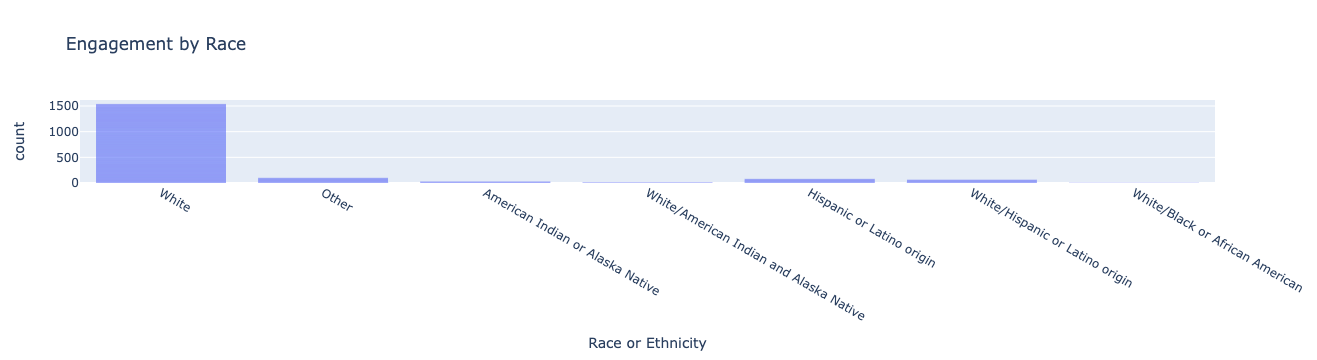

In [34]:
fig = px.bar(responses,
       x='Race or Ethnicity',
       title='Engagement by Race'
      )

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

No surprises there, Silverton is a very white town (as much of the state and many of these small communities are). Now my income is where the labels are formatting strangely, so I'll update that:

In [35]:
responses['Household Income'].to_list

<bound method IndexOpsMixin.tolist of 0       $35,000 to $49,999
1       $35,000 to $49,999
2       $35,000 to $49,999
3       $35,000 to $49,999
4       $35,000 to $49,999
               ...        
2175             $75,000 +
2176     Less than $34,999
2177     Less than $34,999
2178     Less than $34,999
2179     Less than $34,999
Name: Household Income, Length: 2180, dtype: object>

In [36]:
# change names in df using .loc or .iloc 
responses.loc[responses["Household Income"] == "Less than $34,999", "Household Income"] = "Less than 34,999"
responses.loc[responses["Household Income"] == "$35,000 to $49,999", "Household Income"] = "35,000-49,999"
responses.loc[responses["Household Income"] == "$50,000 to $74,999", "Household Income"] = "50,000-74,999"
responses.loc[responses["Household Income"] == "$75,000 +", "Household Income"] = "75,000+"

responses.sample(10)

id     ID          question  \
428   211_c_nac  211.0      change_nat_p   
1039   59_n_got   59.0             needs   
1977  144_f_ouo  144.0              fear   
1633  107_f_ecg  107.0              fear   
398   239_c_hos  239.0  change_housing_p   
1830  127_f_nae  127.0              fear   
1669  109_l_sec  109.0              love   
1567  100_h_see  100.0              hope   
909    48_h_seh   48.0              hope   
1035    59_n_in   59.0             needs   

                                           raw_response          category  \
428   All camp grounds that are not in avalanche pas...  change_questions   
1039  Infrastructure! Economic diversity outside tou...            values   
1977  Bickering to point of obstruction and static a...            values   
1633  Citified, outpriced, views gone, so much build...            values   
398   Tiny houses, alternative building techniques t...  change_questions   
1830  Overrun by the masses. I'm all for everyone to...            values   
1669  I like the support everyone gives in a time of...            values   
1567  Higher education and skills of citizens, free ...            values   
909   Preservation of community values, embracing ar...            values   
1035  Infrastructure! Economic diversity outside tou...            values   

                                theme  \
428   nature and natural environement   
1039                       governance   
1977               outdoor recreation   
1633                         economy    
398                           housing   
1830  nature and natural environement   
1669     sense of place and community   
1567           services and amenities   
909            services and amenities   
1035                   infrastructure   

                                            subtheme  media  group_name  \
428                                   climate change    NaN         NaN   
1039                                    transparency    NaN         NaN   
1977                                            ohvs    NaN         NaN   
1633                                  gentrification    NaN         NaN   
398                                     second homes    NaN         NaN   
1830                       environmental degradation    NaN         NaN   
1669  community closeness (opposite of divisiveness)    NaN         NaN   
1567                                       education    NaN         NaN   
909                                       healthcare    NaN         NaN   
1035                                             NaN    NaN         NaN   

     tactic  ...  Resident Rent/Own Children Lived in Silverton  \
428     NaN  ...       NaN      NaN      NaN                NaN   
1039    NaN  ...  Fulltime     Rent      NaN                NaN   
1977    NaN  ...  Fulltime      Own      NaN                NaN   
1633    NaN  ...  Fulltime      Own      NaN                NaN   
398     NaN  ...  Fulltime     Rent      NaN                NaN   
1830    NaN  ...  Fulltime      Own      NaN                NaN   
1669    NaN  ...  Fulltime     Rent      NaN                NaN   
1567    NaN  ...  Fulltime      Own      NaN                NaN   
909     NaN  ...  Fulltime     Rent      NaN                NaN   
1035    NaN  ...  Fulltime     Rent      NaN                NaN   

                      Age         Community  Race or Ethnicity  \
428                   NaN               NaN                NaN   
1039       20 to 39 years  Silverton Proper              White   
1977       40 to 59 years  Silverton Proper              White   
1633       40 to 59 years  Silverton Proper              White   
398        40 to 59 years  Silverton Proper              White   
1830       40 to 59 years   San Juan County              White   
1669  60 years or greater  Silverton Proper              White   
1567       40 to 59 years  Silverton Proper              Other   
909        40 to 59 years  Silverton Proper              White   
1035

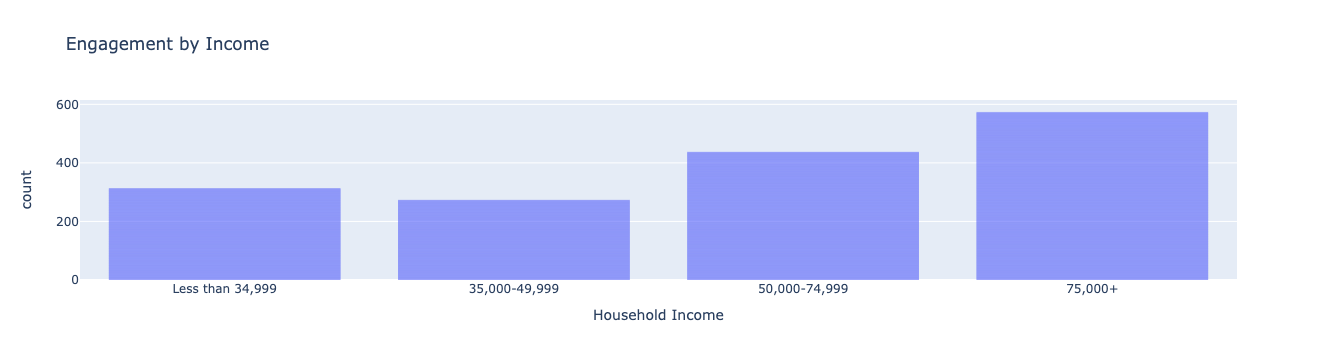

In [37]:
fig = px.bar(responses,
       x='Household Income',
    title='Engagement by Income',
    #labels= {"Less than $34,999":"Less than $34,999",
                   # "$35,000 to $49,999":"$35,000-$49,999",
                   #  "$50,000 to $75,000":"S$50,000-$75,000",
                   # "$75,000":"$75,000"},
   category_orders={"Household Income": ["Less than 34,999", "35,000-49,999", "50,000-74,999", "75,000+"]})          

# get rid of white lines inside the bars
fig.update_traces(marker_line_width=0)

# show the figure
fig.show()

For some reason I'm getting an 'invalid syntax' error with the labels I've tried to add, even though I followed the plotly express documentation. I'll need to keep exploring that so that I can get this table more nicely organized with clear tables and in a logical order.

Update: I'm no longer getting an error (I was missing a comma originally), but now these labels just aren't changing, so still need to sort out that.

## Visualizing by Themes from Survey Data

Next, I'll create some groups to allow me to make some bar charts where I can start looking at themes that appeared in the survey results in relationship to the respondents' demographics. Outside of just understanding the major demographics of the survey respondents, this will be helpful in visualizing the major themes/values and what communities they are important to.

In [38]:
responses.groupby(['Race or Ethnicity']).count()

id    ID  question  raw_response  \
Race or Ethnicity                                                             
American Indian or Alaska Native           26    26        26            26   
Hispanic or Latino origin                  77    77        77            77   
Other                                      97    97        97            97   
White                                    1536  1536      1536          1536   
White/American Indian and Alaska Native    12    12        12            12   
White/Black or African American             6     6         6             6   
White/Hispanic or Latino origin            61    61        61            61   

                                         category  theme  subtheme  media  \
Race or Ethnicity                                                           
American Indian or Alaska Native               26     26        22      0   
Hispanic or Latino origin                      77     77        65      0   
Other                                          97     97        74      0   
White                                        1536   1535      1269      0   
White/American Indian and Alaska Native        12     12        10      0   
White/Black or African American                 6      6         3      0   
White/Hispanic or Latino origin                61     61        52      0   

                                         group_name  tactic  ...  \
Race or Ethnicity                                            ...   
American Indian or Alaska Native                  0       8  ...   
Hispanic or Latino origin                         0       0  ...   
Other                                             0       0  ...   
White                                             0      48  ...   
White/American Indian and Alaska Native           0       0  ...   
White/Black or African American                   0       0  ...   
White/Hispanic or Latino origin                   0       0  ...   

                                         Engagement Tactic  Resident  \
Race or Ethnicity                                                      
American Indian or Alaska Native                        17        26   
Hispanic or Latino origin                               45        77   
Other                                                   21        97   
White                                                  559      1536   
White/American Indian and Alaska Native                  0        12   
White/Black or African American                          0         6   
White/Hispanic or Latino origin                         18        61   

                                         Rent/Own  Children  \
Race or Ethnicity                                             
American Indian or Alaska Native               26         0   
Hispanic or Latino origin                      77         0   
Other                                          88         0   
White                                        1453         0   
White/American Indian and Alaska Native        12         0   
White/Black or African American                 6         0   
White/Hispanic or Latino origin                43         0   

                                         Lived in Silverton   Age  Community  \
Race or Ethnicity                                                              
American Indian or Alaska Native                          0    26         26   
Hispanic or Latino origin                                 0    77         77   
Other                                                     0    97         97   
White                                                     0  1523       1527   
White/American Indian and Alaska Native                   0    12         12   
White/Black or African American                           0     6          6   
White/Hispanic or Latino origin                           0    41         48   

                                         Household Income  Filled out before  \
Race o

In [39]:
responses_grouped=responses.groupby(['Race or Ethnicity','theme']).count()[['ID']]
responses_grouped.head(50)

ID
Race or Ethnicity                       theme                               
American Indian or Alaska Native        economy                            4
                                        growth                             1
                                        housing                            3
                                        infrastructure                     1
                                        nature and natural environement    1
                                        sense of place and community      16
Hispanic or Latino origin               cost of living                     2
                                        economy                           19
                                        governance                         3
                                        housing                           16
                                        infrastructure                     2
                                        nature and natural environement   10
                                        sense of place and community      19
                                        services and amenities             6
Other                                   economy                           16
                                        governance                         6
                                        growth                             2
                                        housing                           17
                                        infrastructure                     3
                                        nature and natural environement    9
                                        outdoor recreation                 4
                                        sense of place and community      32
                                        services and amenities             8
White                                   cost of living                    19
                                        economy                          307
                                        governance                        61
                                        growth                           116
                                        housing                          187
                                        infrastructure                    47
                                        nature and natural environement  127
                                        outdoor recreation               136
                                        sense of place and community     434
                                        services and amenities           101
White/American Indian and Alaska Native economy                           10
                                        infrastructure                     1
                                        services and amenities             1
White/Black or African American         governance                         3
                                        sense of place and community       3
White/Hispanic or Latino origin         cost of living                     1
                                        economy                            9
                                        growth                             4
                                        housing                            3
                                        infrastructure                     5
                                        nature and natural environement    8
                                        outdoor recreation                 4
                                        sense of place and community      19
                                        services and amenities             8

In [40]:
responses_flat =responses_grouped.reset_index()
responses_flat

Race or Ethnicity                            theme  \
0          American Indian or Alaska Native                         economy    
1          American Indian or Alaska Native                           growth   
2          American Indian or Alaska Native                          housing   
3          American Indian or Alaska Native                   infrastructure   
4          American Indian or Alaska Native  nature and natural environement   
5          American Indian or Alaska Native     sense of place and community   
6                 Hispanic or Latino origin                   cost of living   
7                 Hispanic or Latino origin                         economy    
8                 Hispanic or Latino origin                       governance   
9                 Hispanic or Latino origin                          housing   
10                Hispanic or Latino origin                   infrastructure   
11                Hispanic or Latino origin  nature and natural environement   
12                Hispanic or Latino origin     sense of place and community   
13                Hispanic or Latino origin           services and amenities   
14                                    Other                         economy    
15                                    Other                       governance   
16                                    Other                           growth   
17                                    Other                          housing   
18                                    Other                   infrastructure   
19                                    Other  nature and natural environement   
20                                    Other               outdoor recreation   
21                                    Other     sense of place and community   
22                                    Other           services and amenities   
23                                    White                   cost of living   
24                                    White                         economy    
25                                    White                       governance   
26                                    White                           growth   
27                                    White                          housing   
28                                    White                   infrastructure   
29                                    White  nature and natural environement   
30                                    White               outdoor recreation   
31                                    White     sense of place and community   
32                                    White           services and amenities   
33  White/American Indian and Alaska Native                         economy    
34  White/American Indian and Alaska Native                   infrastructure   
35  White/American Indian and Alaska Native           services and amenities   
36          White/Black or African American                       governance   
37          White/Black or African American     sense of place and community   
38          White/Hispanic or Latino origin                   cost of living   
39          White/Hispanic or Latino origin                         economy    
40          White/Hispanic or Latino origin                           growth   
41          White/Hispanic or Latino origin                          housing   
42          White/Hispanic or Latino origin                   infrastructure   
43          White/Hispanic or Latino origin  nature and natural environement   
44          White/Hispanic or Latino origin               outdoor recreation   
45          White/Hispanic or Latino origin     sense of place and community   
46          White/Hispanic or Latino origin           services and amenities   

     ID  
0     4  
1     1  
2     3  
3     1  
4     1  
5    16  
6     2  
7    19  
8     3  
9    16  
10    2  
11   10  
12   19  
13    6  
14   16  
15    6  
16    2  
17   

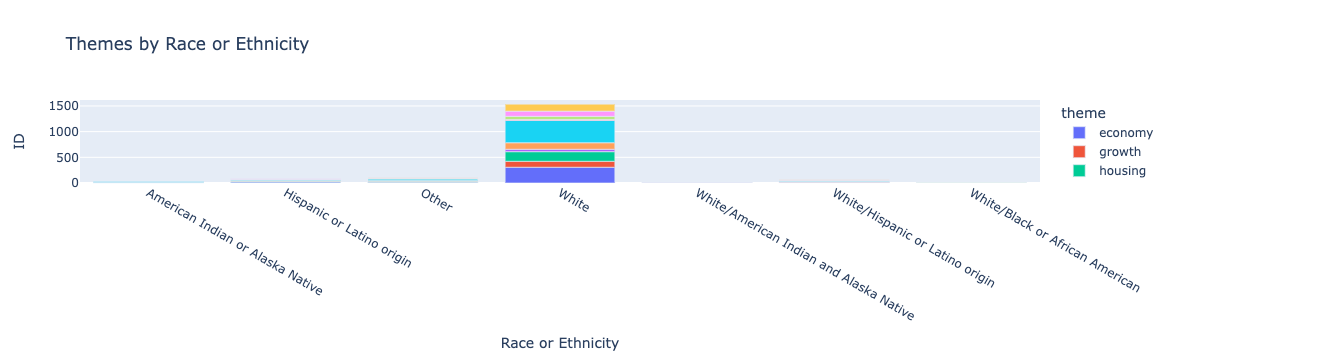

In [41]:
fig = px.bar(responses_flat,
       x='Race or Ethnicity',
        y='ID',
        title='Themes by Race or Ethnicity',
       color='theme' # this creates the "stack"
)

fig.show()

fig.write_html("themes_race.html")

In [42]:
responses_grouped=responses.groupby(['Household Income','theme']).count()[['ID']]
responses_grouped.head(50)

ID
Household Income theme                               
35,000-49,999    cost of living                     6
                 economy                           60
                 governance                         7
                 growth                            16
                 housing                           47
                 infrastructure                    11
                 nature and natural environement   25
                 outdoor recreation                29
                 sense of place and community      60
                 services and amenities            11
50,000-74,999    cost of living                     2
                 economy                           71
                 governance                        23
                 growth                            46
                 housing                           40
                 infrastructure                    16
                 nature and natural environement   34
                 outdoor recreation                38
                 sense of place and community     133
                 services and amenities            34
75,000+          cost of living                     8
                 economy                          109
                 governance                        20
                 growth                            36
                 housing                           75
                 infrastructure                    18
                 nature and natural environement   49
                 outdoor recreation                36
                 sense of place and community     187
                 services and amenities            35
Less than 34,999 cost of living                     5
                 economy                           68
                 governance                        12
                 growth                             9
                 housing                           44
                 infrastructure                     9
                 nature and natural environement   37
                 outdoor recreation                20
                 sense of place and community      88
                 services and amenities            21

In [43]:
responses_flat = responses_grouped.reset_index()
responses_flat

Household Income                            theme   ID
0      35,000-49,999                   cost of living    6
1      35,000-49,999                         economy    60
2      35,000-49,999                       governance    7
3      35,000-49,999                           growth   16
4      35,000-49,999                          housing   47
5      35,000-49,999                   infrastructure   11
6      35,000-49,999  nature and natural environement   25
7      35,000-49,999               outdoor recreation   29
8      35,000-49,999     sense of place and community   60
9      35,000-49,999           services and amenities   11
10     50,000-74,999                   cost of living    2
11     50,000-74,999                         economy    71
12     50,000-74,999                       governance   23
13     50,000-74,999                           growth   46
14     50,000-74,999                          housing   40
15     50,000-74,999                   infrastructure   16
16     50,000-74,999  nature and natural environement   34
17     50,000-74,999               outdoor recreation   38
18     50,000-74,999     sense of place and community  133
19     50,000-74,999           services and amenities   34
20           75,000+                   cost of living    8
21           75,000+                         economy   109
22           75,000+                       governance   20
23           75,000+                           growth   36
24           75,000+                          housing   75
25           75,000+                   infrastructure   18
26           75,000+  nature and natural environement   49
27           75,000+               outdoor recreation   36
28           75,000+     sense of place and community  187
29           75,000+           services and amenities   35
30  Less than 34,999                   cost of living    5
31  Less than 34,999                         economy    68
32  Less than 34,999                       governance   12
33  Less than 34,999                           growth    9
34  Less than 34,999                          housing   44
35  Less than 34,999                   infrastructure    9
36  Less than 34,999  nature and natural environement   37
37  Less than 34,999               outdoor recreation   20
38  Less than 34,999     sense of place and community   88
39  Less than 34,999           services and amenities   21

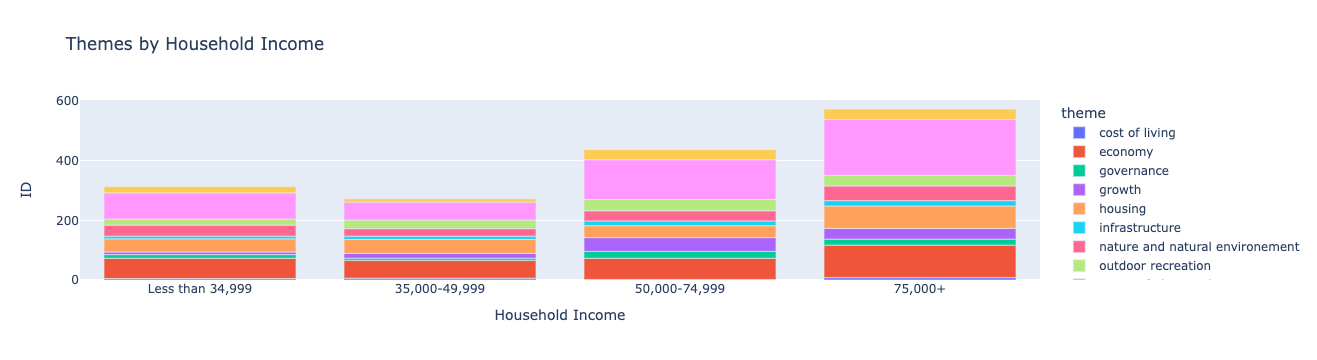

In [44]:
fig = px.bar(responses_flat,
       x='Household Income',
        y='ID',
        title='Themes by Household Income',
       color='theme', # this creates the "stack"
      category_orders={"Household Income": ["Less than 34,999", "35,000-49,999", "50,000-74,999", "75,000+"]})

fig.show()

fig.write_html("themes_income.html")

Again, I'm having the issue with the syntax for the labels that I need to sort out. 

In [45]:
responses_grouped=responses.groupby(['Age','theme']).count()[['ID']]
responses_grouped.head(50)

ID
Age                 theme                               
20 to 39 years      cost of living                     9
                    economy                          159
                    governance                        26
                    growth                            34
                    housing                           90
                    infrastructure                    32
                    nature and natural environement   39
                    outdoor recreation                52
                    sense of place and community     172
                    services and amenities            52
40 to 59 years      cost of living                     8
                    economy                          147
                    governance                        30
                    growth                            50
                    housing                           92
                    infrastructure                    17
                    nature and natural environement   77
                    outdoor recreation                57
                    sense of place and community     205
                    services and amenities            39
60 years or greater cost of living                     4
                    economy                           48
                    governance                        22
                    growth                            34
                    housing                           44
                    infrastructure                     9
                    nature and natural environement   31
                    outdoor recreation                29
                    sense of place and community     129
                    services and amenities            18
Under 19 years      economy                            7
                    growth                             4
                    housing                            8
                    nature and natural environement    7
                    outdoor recreation                10
                    sense of place and community      18
                    services and amenities            11

In [46]:
responses_flat = responses_grouped.reset_index()
responses_flat

Age                            theme   ID
0        20 to 39 years                   cost of living    9
1        20 to 39 years                         economy   159
2        20 to 39 years                       governance   26
3        20 to 39 years                           growth   34
4        20 to 39 years                          housing   90
5        20 to 39 years                   infrastructure   32
6        20 to 39 years  nature and natural environement   39
7        20 to 39 years               outdoor recreation   52
8        20 to 39 years     sense of place and community  172
9        20 to 39 years           services and amenities   52
10       40 to 59 years                   cost of living    8
11       40 to 59 years                         economy   147
12       40 to 59 years                       governance   30
13       40 to 59 years                           growth   50
14       40 to 59 years                          housing   92
15       40 to 59 years                   infrastructure   17
16       40 to 59 years  nature and natural environement   77
17       40 to 59 years               outdoor recreation   57
18       40 to 59 years     sense of place and community  205
19       40 to 59 years           services and amenities   39
20  60 years or greater                   cost of living    4
21  60 years or greater                         economy    48
22  60 years or greater                       governance   22
23  60 years or greater                           growth   34
24  60 years or greater                          housing   44
25  60 years or greater                   infrastructure    9
26  60 years or greater  nature and natural environement   31
27  60 years or greater               outdoor recreation   29
28  60 years or greater     sense of place and community  129
29  60 years or greater           services and amenities   18
30       Under 19 years                         economy     7
31       Under 19 years                           growth    4
32       Under 19 years                          housing    8
33       Under 19 years  nature and natural environement    7
34       Under 19 years               outdoor recreation   10
35       Under 19 years     sense of place and community   18
36       Under 19 years           services and amenities   11

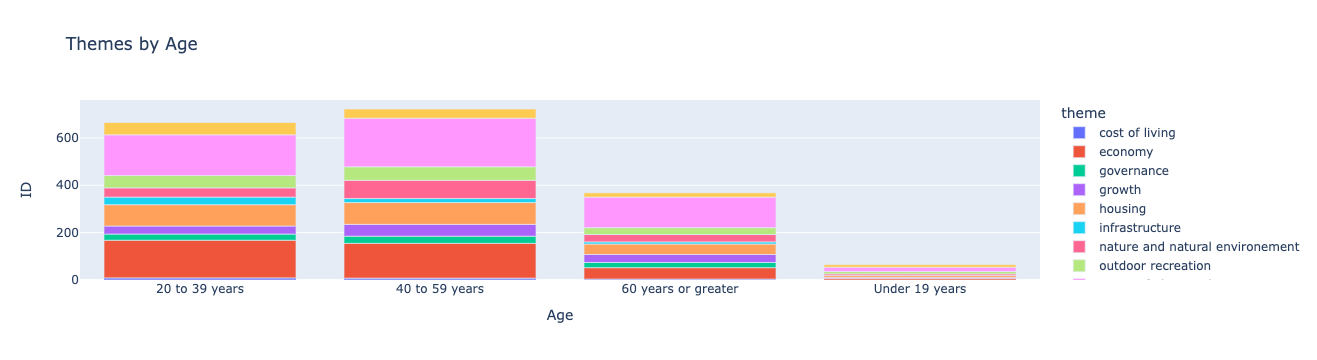

In [47]:
fig = px.bar(responses_flat,
       x='Age',
        y='ID',
        title='Themes by Age',
       color='theme' # this creates the "stack"
    #category_orders={'Age': ["Under 19 years", "20 to 39 years", "40 to 59 years", "60 years or greater"]}
            )
fig.show()

fig.write_html("themes_age.html")

In [48]:
responses_grouped=responses.groupby(['Rent/Own','theme']).count()[['ID']]
responses_grouped.head(50)

ID
Rent/Own theme                               
Own      cost of living                    13
         economy                          237
         governance                        55
         growth                            92
         housing                          146
         infrastructure                    35
         nature and natural environement  104
         outdoor recreation               112
         sense of place and community     369
         services and amenities            92
Rent     cost of living                     9
         economy                          109
         governance                        21
         growth                            31
         housing                           67
         infrastructure                    23
         nature and natural environement   46
         outdoor recreation                37
         sense of place and community     132
         services and amenities            27

In [49]:
responses_flat = responses_grouped.reset_index()
responses_flat

Rent/Own                            theme   ID
0       Own                   cost of living   13
1       Own                         economy   237
2       Own                       governance   55
3       Own                           growth   92
4       Own                          housing  146
5       Own                   infrastructure   35
6       Own  nature and natural environement  104
7       Own               outdoor recreation  112
8       Own     sense of place and community  369
9       Own           services and amenities   92
10     Rent                   cost of living    9
11     Rent                         economy   109
12     Rent                       governance   21
13     Rent                           growth   31
14     Rent                          housing   67
15     Rent                   infrastructure   23
16     Rent  nature and natural environement   46
17     Rent               outdoor recreation   37
18     Rent     sense of place and community  132
19     Rent           services and amenities   27

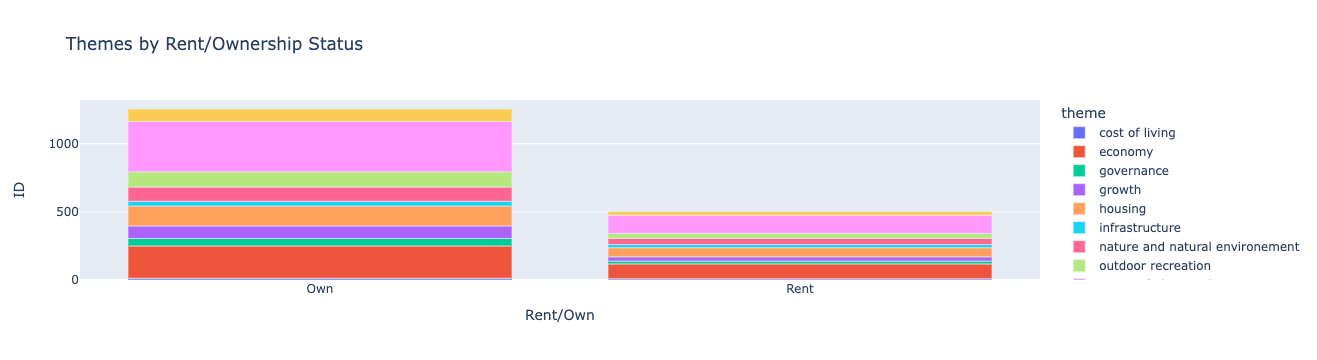

In [50]:
fig = px.bar(responses_flat,
       x='Rent/Own',
        y='ID',
        title='Themes by Rent/Ownership Status',
       color='theme' # this creates the "stack"
)

fig.show()

fig.write_html("themes_rent_own.html")

Great, I think there are certainly more visualizations that can be done with these survey responses and demographics, but for now these seem like a good start in working with this survey data and having the demographics and themes linked together in a visually interesting way. 

## Word Clouds

I'm going to now use the survey responses from my "raw_response" column to create some word clouds. 

In [51]:
responses[responses.question=='love']

id     ID question  \
459      1_l_na    1.0     love   
460      1_l_ou    1.0     love   
472      2_l_na    2.0     love   
473     2_l_sec    2.0     love   
481     3_l_sec    3.0     love   
...         ...    ...      ...   
2160   50_l_sed   50.0     love   
2161   50_l_ecs   50.0     love   
2162   50_l_ecj   50.0     love   
2163   50_l_gop   50.0     love   
2176  124_l_ses  124.0     love   

                                           raw_response category  \
459             Proximity to mountains and back country   values   
460             Proximity to mountains and back country   values   
472   Skill, comradery, fiercely independent spirit,...   values   
473   Skill, comradery, fiercely independent spirit,...   values   
481   Caring for each other, involved+ extending; sa...   values   
...                                                 ...      ...   
2160  Splintering due to politics, too much of a vac...   values   
2161  Splintering due to politics, too much of a vac...   values   
2162  Splintering due to politics, too much of a vac...   values   
2163  Splintering due to politics, too much of a vac...   values   
2176                                Away from the city    values   

                                theme  \
459   nature and natural environement   
460                outdoor recreation   
472   nature and natural environement   
473      sense of place and community   
481      sense of place and community   
...                               ...   
2160     sense of place and community   
2161                         economy    
2162                         economy    
2163                       governance   
2176     sense of place and community   

                                            subtheme  media  group_name  \
459                                              NaN    NaN         NaN   
460                                              NaN    NaN         NaN   
472                                              NaN    NaN         NaN   
473   community closeness (opposite of divisiveness)    NaN         NaN   
481   community closeness (opposite of divisiveness)    NaN         NaN   
...                                              ...    ...         ...   
2160                                    divisiveness    NaN         NaN   
2161                                    second homes    NaN         NaN   
2162                                   jobs security    NaN         NaN   
2163                                    public lands    NaN         NaN   
2176                                 small town feel    NaN         NaN   

          tactic  ...  Resident Rent/Own Children Lived in Silverton  \
459   Interviews  ...  Fulltime      Own      NaN                NaN   
460          NaN  ...  Fulltime      Own      NaN                NaN   
472   Interviews  ...  Fulltime     Rent      NaN                NaN   
473   Interviews  ...  Fulltime     Rent      NaN                NaN   
481   Interviews  ...  Fulltime      Own      NaN                NaN   
...          ...  ...       ...      ...      ...                ...   
2160         NaN  ...       NaN      NaN      NaN                NaN   
2161         NaN  ...       NaN      NaN      NaN                NaN   
2162         NaN  ...       NaN      NaN      NaN                NaN   
2163         NaN  ...       NaN      NaN      NaN                NaN   
2176         NaN  ...  Fulltime      Own      NaN                NaN   

                      Age         Community  Race or Ethnicity  \
459   60 years or greater  Silverton Proper              White   
460   60 years or greater  Silverton Proper              White   
472        20 to 39 years  Silverton Proper              White   
473        20 to 39 years  Silverton Proper              White   
481   60 years or greater  Silverton Proper              White   
...                   ...               ...                ...   
2160                  NaN               NaN           

In [52]:
responses.sample(20)

id     ID          question  \
1728   115_n_ho  115.0             needs   
1371   81_f_seh   81.0              fear   
1448   86_l_ses   86.0              love   
1536   97_l_sec   97.0              love   
184   198_c_ecl  198.0     change_econ_p   
1186   67_h_set   67.0              hope   
1052   60_h_sea   60.0              hope   
1732  115_n_ecg  115.0             needs   
522     9_f_gom    9.0              fear   
631    18_l_oup   18.0              love   
700     25_h_na   25.0              hope   
1169   66_h_sed   66.0              hope   
894    47_l_sed   47.0              love   
678    21_n_grr   21.0             needs   
375   219_c_hoy  219.0  change_housing_p   
886    47_f_ouo   47.0              fear   
1401   83_h_ecd   83.0              hope   
493     5_f_ect    5.0              fear   
855    44_l_ses   44.0              love   
453   157_c_ses  157.0    change_sense_p   

                                           raw_response          category  \
1728  Housing and infrastructure. Trails are being d...            values   
1371  Fragile here, the town politics are bad, loss ...            values   
1448           small, committed, outdoorsy, interested             values   
1536                            The love and the people            values   
184   Increased population would lead to more sustai...  change_questions   
1186  That the rugged individualists and odd puzzle ...            values   
1052  Recreational tourism. Taking back these issues...            values   
1732  Housing and infrastructure. Trails are being d...            values   
522   What growth is actually good for us. What will...            values   
631   small mountain town surrounded by public lands...            values   
700   That will utlize our greatest asset "the publi...            values   
1169  Diverse, not one-dimensional community. Cultur...            values   
894   My opinion: wilderness/snow/seasons, variety o...            values   
678   Get internet/IT situation figured out, lack of...            values   
375   In town affordable - anvil is good, need more....  change_questions   
886   my opinion: discord/conflict, development, wat...            values   
1401  Sustainable growth that maintains the small mi...            values   
493   Outsiders (unreal others); out of control grow...            values   
855   Proximity to nature - wildlife, never having t...            values   
453   Continued development and maintenance of trail...  change_questions   

                                theme  \
1728                          housing   
1371     sense of place and community   
1448     sense of place and community   
1536     sense of place and community   
184                          economy    
1186     sense of place and community   
1052     sense of place and community   
1732                         economy    
522                        governance   
631                outdoor recreation   
700   nature and natural environement   
1169     sense of place and community   
894      sense of place and community   
678                            growth   
375                           housing   
886                outdoor recreation   
1401                         economy    
493                          economy    
855      sense of place and community   
453      sense of place and community   

                                            subtheme  media  group_name  \
1728                                             NaN    NaN         NaN   
1371                           historic preservation    NaN         NaN   
1448                                 small town feel    NaN         NaN   
1536  community closeness (opposite of divisiveness)    NaN         NaN   
184                                lack of workforce    NaN         NaN   
1186                        tough environment (grit)    NaN         NaN   
1052                                arts and culture    NaN         NaN   
1732    

In [53]:
response = responses.sample().raw_response.values[0]
print(response)

Preservation of community values, embracing artistic expression, livable community for families - financially, healthcare and services, education 


In [54]:
list(STOPWORDS)

['shall',
 'has',
 'could',
 'below',
 'this',
 'can',
 "i'm",
 'what',
 "i've",
 "what's",
 'does',
 'they',
 'between',
 'own',
 'before',
 "they'll",
 'some',
 'above',
 'their',
 'an',
 'why',
 'them',
 'with',
 'get',
 "she'll",
 'on',
 'to',
 "you've",
 'here',
 'same',
 'who',
 "that's",
 'hence',
 'have',
 'which',
 'up',
 'she',
 'those',
 'at',
 'would',
 "he'd",
 'through',
 'both',
 "haven't",
 "it's",
 'r',
 'http',
 'him',
 'further',
 "she'd",
 'off',
 'else',
 'should',
 'whom',
 'because',
 'otherwise',
 'ever',
 'himself',
 'then',
 "there's",
 'over',
 'again',
 'nor',
 "she's",
 "won't",
 'all',
 "couldn't",
 'and',
 'k',
 'therefore',
 "they're",
 'if',
 'are',
 'being',
 'down',
 "they've",
 'from',
 'is',
 'be',
 'you',
 'do',
 'a',
 "he'll",
 "mustn't",
 'until',
 'or',
 'very',
 'your',
 'under',
 'we',
 'into',
 "aren't",
 'myself',
 "hasn't",
 'no',
 'for',
 'not',
 'after',
 "doesn't",
 "can't",
 'while',
 'when',
 'most',
 'it',
 'me',
 "here's",
 'am',
 'h

In [55]:
stop_words = list(STOPWORDS)
stop_words.append('Silverton')

I added Silverton to my stopwords, because I wanted to keep the town name anonymous for the purposes of publishing these visualizations.

In [56]:
# create an all_text variable that combines all of my raw responses into a single variable:
all_text = ' '.join(responses['raw_response'])

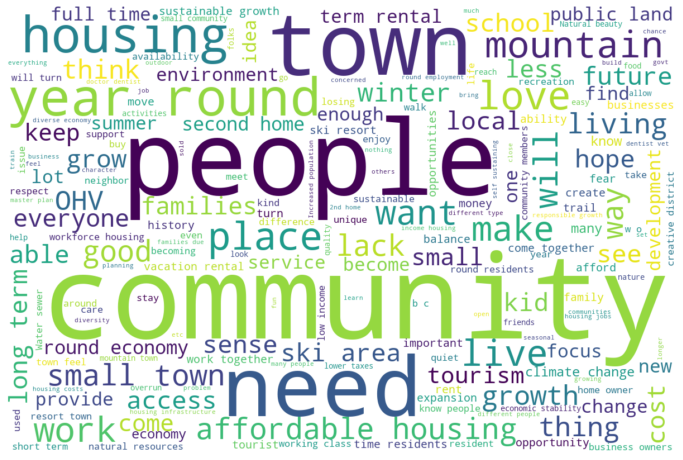

In [57]:
wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text)

# Display the WordCloud                    
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Next, I want to look at how these clouds might look based on the question type.

After meeting with Ryan in OH Friday, here's what I need to do:

run for loop for each question type, put that word cloud code into a function, run that function for unique values of the question

function = make all_text equivalent (where question is "love" do the join) creates all text for that question

In [58]:
qs = ['love','fear','needs','hope']

In [59]:
#Create a new variable for all_text based on question? 
#all_text_q = ' '.join(responses['raw_response'],['question'='love'])

## YK: modified the loop below

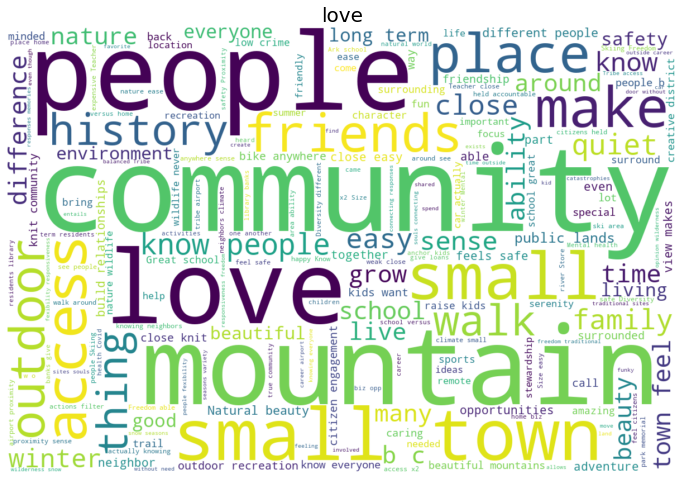

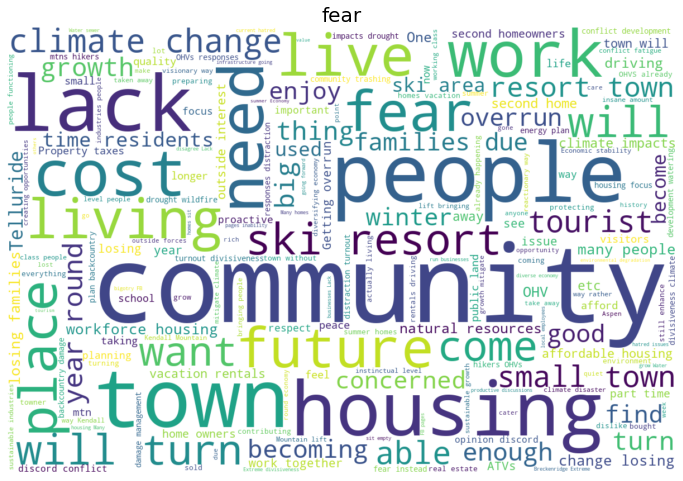

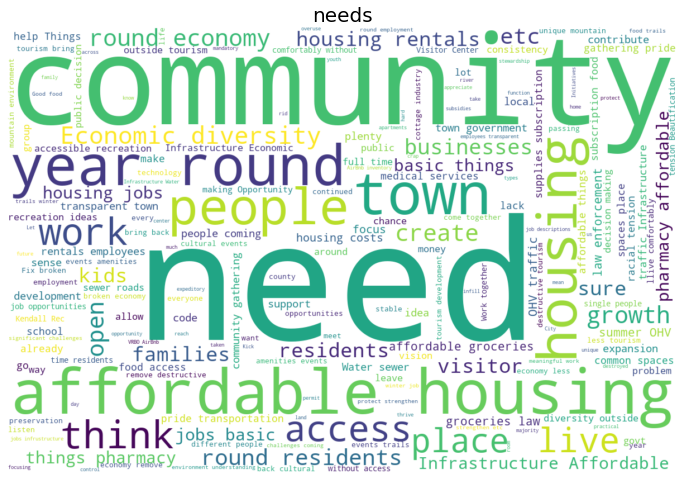

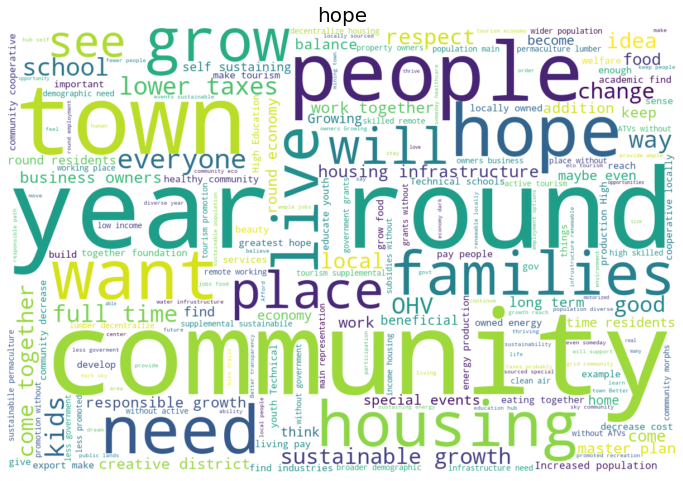

In [60]:
for question in qs:
    
    # filter the reponses by question type
    all_text = ' '.join(responses[responses.question==question]['raw_response'])
    wordcloud = WordCloud(width=1200, 
                      height=800,
                      background_color="white",
                      stopwords=stop_words).generate(all_text)

    # Display the WordCloud                    
    plt.figure(figsize=(12,12))
    plt.title(question,fontsize=20)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

Lastly, I'll run a sentiment analysis on the survey responses to try to gauge the overall temperature of these surveys.
    

In [61]:
# from a random response
random = responses.sample().raw_response.values[0]
print(random)

# analyze the tweet
a = TextBlob(random)

# results
a.sentiment

Opportunity and stability to be here long term (jobs/housing/sense of belonging). Age in place. Services - dentist, vet etc. (also revolves economy locally). community activities and events - come together in commonality. Community members own + drive growth - not outside investors. Inclusivity. 


Sentiment(polarity=0.13749999999999998, subjectivity=0.3625)

In [62]:
# create an new (empty) column for polarity
responses['polarity']=''

In [63]:
# loop through every row and add the polarity value in our new column
for i, row in responses.iterrows():
    a = TextBlob(row.raw_response)
    responses.at[i,'polarity'] = a.polarity

In [64]:
responses[['raw_response','polarity']].sample(5)

raw_response  polarity
1791  The small size and the folks that are working/... -0.111905
900       Parking lot - ideas, solutions, opportunities       0.0
1216  I want to see the town grow a little but with ...  0.376563
1003  Diversification of our economy. Tourism is onl... -0.115278
263   Negative > OHV > allowing people is awful to l... -0.247511

Quantifying the results based on the positive, neutral, or negative categorical values of Numpy using .select

In [66]:
# create a list of our conditions
conditions = [
    (responses['polarity'] < -0.2), # very negative
    (responses['polarity'] < 0) & (responses['polarity'] >= -0.2),   # negative
    (responses['polarity'] == 0),  # neutral
    (responses['polarity'] > 0) & (responses['polarity'] <= 0.2),    # positive
    (responses['polarity'] > 0.2)  # very positive
    ]

# create a list of the values we want to assign for each condition
values = [
    'very negative', 
    'negative', 
    'neutral', 
    'positive',
    'very positive'
    ]

# create a new column and use np.select to assign values to it using our lists as arguments
responses['sentiment'] = np.select(conditions, values)

In [67]:
responses.sample(5)[['raw_response','polarity','sentiment']]

raw_response  polarity sentiment
1133  My dream for Silverton is a dream of resilinec...       0.1  positive
1443  Too much time and energy focused on dissention...  0.066667  positive
1707  Plan for the future to include limiting the de...       0.0   neutral
1607           A diverse economy and affordable housing       0.0   neutral
1492  Water, sewer, roads - infrastructure. Town wid...      -0.1  negative

Creating a sentiment bar chart: 

In [68]:
# get a 5 colors from sequential color bar
sentiment_colors = ox.plot.get_colors(5,cmap='PiYG',return_hex=True)

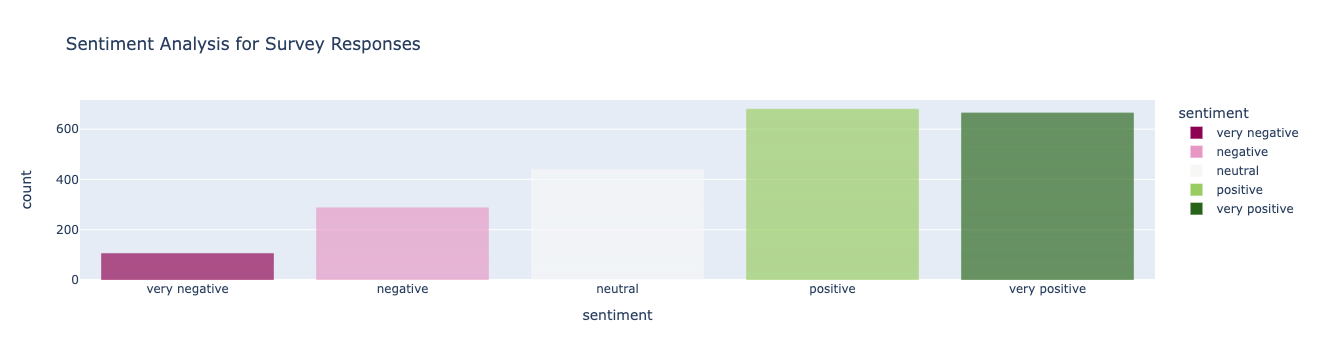

In [75]:
# bar chart
fig = px.bar(responses, 
             x='sentiment',
             width=600,
             title='Sentiment Analysis for Survey Responses',
             color='sentiment',
             category_orders = {'sentiment':['very negative','negative','neutral','positive','very positive']},
             color_discrete_sequence=sentiment_colors, # use the colors selected in previous cell
            )
# fig.update_traces(textinfo='value')
fig.update_traces(marker_line_width=0) # gets rid of horizontal white lines
fig.show()

fig.write_html("sentimentanalysis.html")

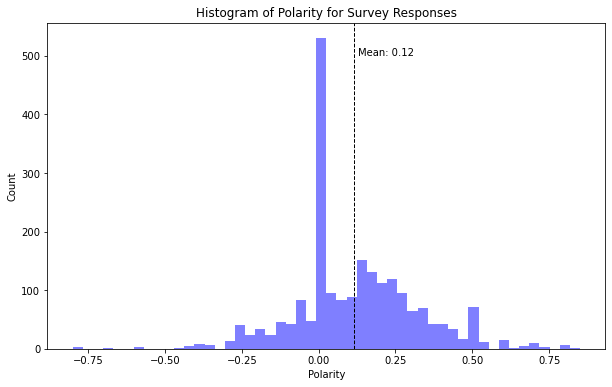

In [76]:
# and now a histogram
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(responses.polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of Polarity for Survey Responses')

plt.axvline(responses.polarity.mean(), color='k', linestyle='dashed', linewidth=1)

min_ylim, max_ylim = plt.ylim()
plt.text(responses.polarity.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(responses.polarity.mean()))

plt.show();

plt.savefig('sentiment_hist.png')